# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [6]:
data.shape


(4870, 65)

In [7]:
print(sum(data['race'].isnull()))
print(sum(data['call'].isnull()))

0
0


In [8]:
ssize_b = data[data.race=='b'].count()
n_b = ssize_b['race']
ssize_w = data[data.race=='w'].count()
n_w = ssize_b['race']
n = n_b + n_w

print(n_b, n_w, n)
n == len(data['race'])

2435 2435 4870


True

In [9]:
# Create dataframe for 2 populations(sample size and proportion of successes)
success_b = sum(data[data.race=='b'].call)
success_w = sum(data[data.race=='w'].call)
freq_b = success_b/n_b
freq_w = success_w/n_w

d = {'sample_size': [n_b, n_w], 'num_success': [success_b, success_w], 'freq_success':[freq_b, freq_w], 
     'populations': ['Black name', 'White name']}
table1 = pd.DataFrame(data=d)

table1

,sample_size,num_success,freq_success,populations
0,2435,157.0,0.064476,Black name
1,2435,235.0,0.096509,White name


In [10]:
#Determine if sample size is large enough for confidence intervals
lg_sampleb = n_b * freq_b
print(lg_sampleb)
print(lg_sampleb >= 10)

lg_samplew = n_w * freq_w
print(lg_samplew)
print(lg_samplew >= 10)

157.0
True
235.0
True


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

**What test is appropriate for this problem? Does CLT apply?**
This data represents samples from two populations, black names and white names. We are told that the two samples are randomly assigned to the employers. Therefore they can be considered independent because names making up one sample do not influence the selection of names from the other sample. 

We can compare these two population based on 'success' proportions. Success is defined as having received a call from an employer. The table above shows the number and frequency of success (# calls) for each population, Black name or White name. We can construct a large-sample confidence interval for a difference in population proportions. The following conditions must be met:

1. The samples are independent random samples from the populations of interest.
2. The sample sizes are large. This criteria is met when the sample size multiplied by the sample proportion is greater than or equal to 10. Shown above, samples for both populations are large enough.

It is also possible to take multiple samples with replacement from this large a sample for each population. A bootstrapping method could done using assumptions about the Central Limit Theorem to create normal distributions of the means from a large number of samples. The Central Limit Theorem states that as the sample size increases, the distribution approaches a normal distribution. We can then conduct a t-test to test the difference between these two distributions.

The CLT has one additional assumption that:

When the sample is drawn without replacement the sample size, n, should be no more than 10% of the population. If we consider the population to be all black sounding names and all white sounding names in the job market today, then it is easy to meet this criteria. Even if we limit ourselves to just these numbers as the populations, so long as we draw samples less than 243 (approximately 10% of 2435) we will meet this condition.

**What are the null and alternate hypotheses?**

Ho: There is no difference in the frequency of employer calls between the two popultions Black names and White names.
Ha: There is a difference in the frequency of employer calls between the two popultions Black names and White names.

Mathematically this looks like:

Ho:  p1 - p2 = 0 where p1 and p2 are the population proportions of successes in each population.

Ha:  p1 - p2 != 0

In [11]:
w = data[data.race=='w']
b = data[data.race=='b']

**Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.**



## Frequentist Approach:

NOTE: I wanted to practice writing and using functions, so I've done the frequentist approach "long-hand" by creating functions with raw calculations.

### Margin of error

In [12]:
import math

#Calculate margins of error for each population
def marg_error(p, n_p):
    """This function calculates the margin of error for a population"""
    x_me = (p*(1-p))/n_p
    sqroot_me = math.sqrt(x_me)

    me = 1.96*sqroot_me
    return me

#Call functions on both populations
me_b = marg_error(freq_b, n_b)
me_w = marg_error(freq_w, n_w)

print('Margin of error for black name successes: ', me_b)
print('Margin of error for white name successes: ', me_w, '\n')

print('INTERPRETATION:\n')
print('For black name successes the frequency is ', round(freq_b, 3))
print('It is unlikely that it will differ from the actual population by more than', round(me_b, 3))
print('\nFor white name successes the frequency is ', round(freq_w, 3))
print('It is unlikely that it will differ from the actual population by more than', round(me_w, 3))

Margin of error for black name successes:  0.009755158027911414
Margin of error for white name successes:  0.011728781469131009 

INTERPRETATION:

For black name successes the frequency is  0.064
It is unlikely that it will differ from the actual population by more than 0.01

For white name successes the frequency is  0.097
It is unlikely that it will differ from the actual population by more than 0.012


### Confidence Interval

In [18]:


#Create functions for 95% CI
def upper(p1, p2, n1, n2):
    """These functions calculates the Confidence interval for the difference between 2 populations"""

    x_ci = ((p1*(1-p1))/n1) + ((p2*(1-p2))/n2)
    sqroot = math.sqrt(x_ci)
    
    ci_upper = (p1 - p2) + (1.96 * sqroot)
    return ci_upper

def lower(p1, p2, n1, n2):
    x_ci = ((p1*(1-p1))/n1) + ((p2*(1-p2))/n2)
    sqroot = math.sqrt(x_ci)
    
    ci_lower = (p1 - p2) - (1.96 * sqroot)
    return ci_lower

#Call functions upper and lower for the data
ci_up = upper(freq_b, freq_w, n_b, n_w)
ci_low = lower(freq_b, freq_w, n_b, n_w)

#Print out actual difference in proportions
diff = freq_b - freq_w
print('Actual difference in proportions: ', diff)

#Print out 95% confidence interval
print('Confidence Interval: ', ci_low, ', ', ci_up)

if diff >= ci_low and diff <= ci_up:
    print('The interval contains the actual difference.')
else:
    print('The interval does not contain the actual difference.')


Actual difference in proportions:  -0.032032854209445585
Confidence Interval:  -0.047288260559332024 ,  -0.016777447859559147
The interval contains the actual difference.


**Interpretation:**
The confidence interval contains the actual difference in proportions, and does not contain zero. We can conclude that the sample proportions are different and that applications with black sounding names received fewer calls from employers.

### Calculate p-value

In [19]:
freq_tot = (success_b + success_w)/n

def z_score(p1, p2, n1, n2, pc):
    """This function calculates the z-score for the difference between 2 populations"""
    x_p = ((pc*(1-pc))/n1) + ((pc*(1-pc))/n2)
    sqroot_p = math.sqrt(x_p)
    z = (p1-p2)/sqroot_p
    return z

z_score_p = z_score(freq_b, freq_w, n_b, n_w, freq_tot)
prob = stats.norm.cdf(z_score_p)

#p-value is twice the area under the curve to the right or left of z_score
p_val = 2*prob
print('Z_score: ', z_score_p)
print('P-value: ', p_val)

if (p_val < 0.05):
    print('The difference is significant.')
else:
    print('There is no significant difference between the populations.')

Z_score:  -4.108412152434346
P-value:  3.983886837585077e-05
The difference is significant.


## Hacker Statistics

Here I will use bootstrapping to simulate taking multiple samples (assuming CLT conditions are met) and estimating the parameters of the distributions. From this I can generate confidence intervals and conduct hypothesis testing. 

First, I will compute a bootstrap estimate of the probability density function of the frequency of successes for each population.  These are probabilistic estimates of the frequencies of successes (calls from employers). I will plot the PDF as a histogram, and test that it is Normal.

In [73]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

data['call_b'] = data[data.race=='b'].call
data['call_w'] = data[data.race=='w'].call

df_b = pd.DataFrame(data['call_b'])
df_w = pd.DataFrame(data['call_w'])

df_b = df_b.dropna()
df_w = df_w.dropna()


# Take 10,000 bootstrap replicates of 'call' for black names
bs_replicates = draw_bs_reps(df_b['call_b'], np.sum, 10000)
bs_replicates_b = bs_replicates

# Take 10,000 bootstrap replicates of 'call' for white names
bs_replicates = draw_bs_reps(df_w['call_w'], np.sum, 10000)
bs_replicates_w = bs_replicates

bs_mean_b = np.mean(bs_replicates_b)
bs_mean_w = np.mean(bs_replicates_w)

print('Mean black names: ', bs_mean_b)
print('Mean white names: ', bs_mean_w, '\n')

# Compute and print SEM for black names
sem_b = np.std(bs_replicates_b / np.sqrt(len(bs_replicates_b)))
print('SEM black names: ', sem_b)

# Compute and print SEM for white names
sem_w = np.std(bs_replicates_w / np.sqrt(len(bs_replicates_w)))
print('SEM white names: ', sem_w, '\n')
                  
# Compute and print standard deviation of bootstrap replicates for black names
bs_std_b = np.std(bs_replicates_b)
print('Standard deviation black names: ', bs_std_b)

# Compute and print standard deviation of bootstrap replicates for white names
bs_std_w = np.std(bs_replicates_w)
print('Standard deviation white names: ', bs_std_w)




Mean black names:  156.9547
Mean white names:  235.064 

SEM black names:  0.1220898226348126
SEM white names:  0.14664327601359703 

Standard deviation black names:  12.208982263481259
Standard deviation white names:  14.664327601359702


Mean black names:  156.9547
Mean white names:  235.064 

95% confidence interval black names = [134. 181.]
95% confidence interval white names = [206. 265.]


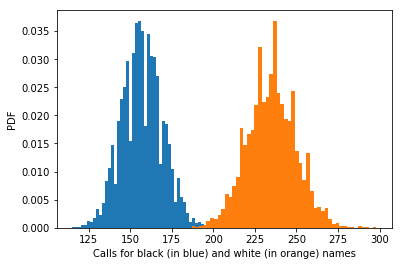

In [75]:
import matplotlib.pyplot as plt


print('Mean black names: ', bs_mean_b)
print('Mean white names: ', bs_mean_w, '\n')

# Compute the 95% confidence interval for black names
conf_int_b = np.percentile(bs_replicates_b, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval black names =', conf_int_b)

# Compute the 95% confidence interval for white names
conf_int_w = np.percentile(bs_replicates_w, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval white names =', conf_int_w)

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates_b, bins=50, density=True)
#_ = plt.xlabel('Calls for black names')
#_ = plt.ylabel('PDF')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates_w, bins=50, density=True)
_ = plt.xlabel('Calls for black (in blue) and white (in orange) names')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


Both of the means fall inside the 95% confidence intervals for each population so we can reasonably say that we have captured the data. These two distributions are very different. This supports the findings from the frequentist calculations.

Now I will perform permutations from these two distributions to simulate the hypothesis that two variables have identical probability distributions. I will use the bootstrap samples that I generated as normally distributed random variables.

In [80]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = (data_1).mean() - np.mean(data_2)

    return diff

# Compute difference of mean for black names and white names
empirical_diff_means = diff_of_means(bs_replicates_b, df_w['call_w'])



# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(bs_replicates_b, bs_replicates_w,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)



p-value = 0.0


As expected, the p-value is extremely low. These two distributions are very different and we can conclude that there is a strong significant difference between calls made to white names and calls made to black names.

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

4.  Write a story describing the statistical significance in the context of the original problem.

5.  Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?


For the original data, the only statistic that we could work with was the sum of the calls, which were entered as 1's for a successful call back. I was able to determine the frequency for each sample and used frequentist statistics to show that there was a significant difference in the number of call backs between the two groups. There were significantly fewer call backs for black sounding names than for white sounding names. 

I created bootstrap samples from these samples to develop normal distributions for each of these samples. I computed confidence intervals and the means for both groups were well within the respective intervals. I ran a permutation test with the two groups and calculated a p-value that confirmed that the two groups are significantly different. Resumes with white sounding names were called more than resumes with black sounding names.

No, it doesn't weight the factor(s) for callback success. You can't say that race/name is the most important without also testing other possible predictors. For that, you could assemble the other candidates and run logistic regression to predict call-backs. Then compare to see which model predicts the best. You could also run a similar test for gender. Is there a difference for male vs female names, for example.


